In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('train_ctrUa4K.csv')
test_data = pd.read_csv('test_lAUu6dG.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_data.duplicated().sum()

0

In [9]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

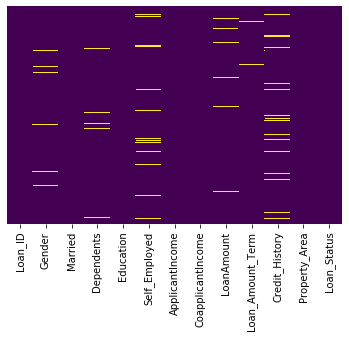

In [10]:
sns.heatmap(train_data.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

# Exploratory Data Analysis

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

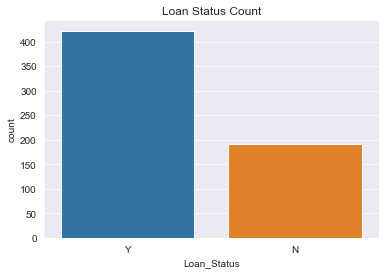

In [11]:
plt.figure(figsize =(6,4))
sns.set_style('darkgrid')
sns.countplot(x = 'Loan_Status', data = train_data)
plt.title('Loan Status Count')
train_data['Loan_Status'].value_counts(normalize = True)

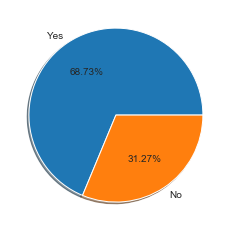

In [12]:
plt.pie(train_data['Loan_Status'].value_counts(), labels = ['Yes', 'No'], shadow = True, autopct = '%1.2f%%');

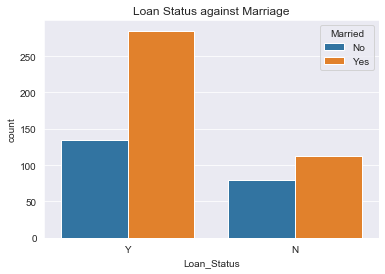

In [13]:
plt.figure(figsize =(6,4))
sns.set_style('darkgrid')
sns.countplot(x = 'Loan_Status', hue = 'Married', data = train_data)
plt.title('Loan Status against Marriage');

In [14]:
pd.DataFrame(train_data.groupby(['Married','Loan_Status'])['Loan_Status'].count())

Loan_Status
Married Loan_Status             
No      N                     79
        Y                    134
Yes     N                    113
        Y                    285

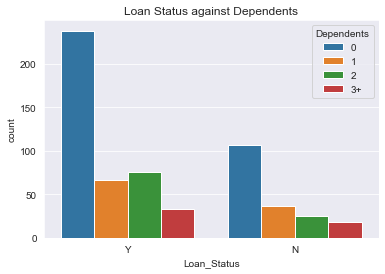

In [15]:
plt.figure(figsize =(6,4))
sns.set_style('darkgrid')
sns.countplot(x = 'Loan_Status', hue = 'Dependents', data = train_data)
plt.title('Loan Status against Dependents');

In [16]:
pd.DataFrame(train_data.groupby(['Dependents','Loan_Status'])['Loan_Status'].count())

Loan_Status
Dependents Loan_Status             
0          N                    107
           Y                    238
1          N                     36
           Y                     66
2          N                     25
           Y                     76
3+         N                     18
           Y                     33

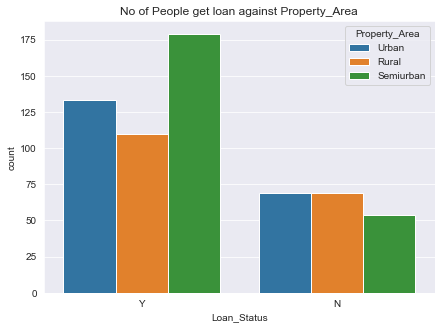

In [17]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Loan_Status', hue = 'Property_Area', data = train_data)
plt.title('No of People get loan against Property_Area');

In [18]:
pd.DataFrame(train_data.groupby(['Property_Area', 'Loan_Status'])['Loan_Status'].count())

Loan_Status
Property_Area Loan_Status             
Rural         N                     69
              Y                    110
Semiurban     N                     54
              Y                    179
Urban         N                     69
              Y                    133

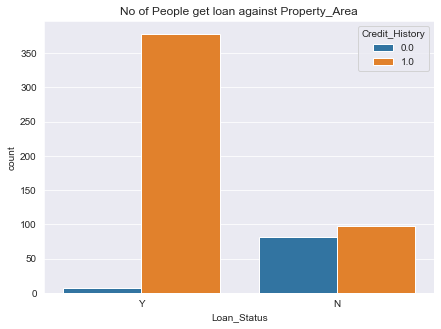

In [19]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Loan_Status', hue = 'Credit_History', data = train_data)
plt.title('No of People get loan against Property_Area');

In [20]:
pd.DataFrame(train_data.groupby(['Credit_History', 'Loan_Status'])['Loan_Status'].count())

Loan_Status
Credit_History Loan_Status             
0.0            N                     82
               Y                      7
1.0            N                     97
               Y                    378

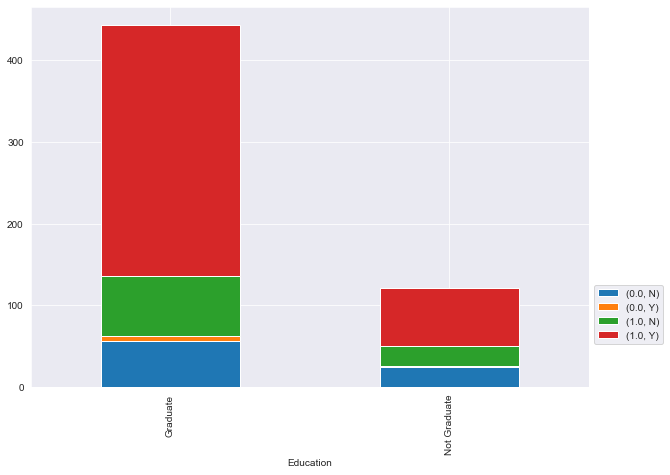

In [21]:
a = pd.crosstab(train_data['Education'], [train_data['Credit_History'], train_data['Loan_Status']])
a.plot(kind = 'bar', stacked = True, figsize = (10,7), legend = True).legend(loc=3, bbox_to_anchor=(1.0,0.1));

In [22]:
pd.DataFrame(train_data.groupby(['Education','Credit_History','Loan_Status'])['Loan_Status'].count())

Loan_Status
Education    Credit_History Loan_Status             
Graduate     0.0            N                     57
                            Y                      6
             1.0            N                     73
                            Y                    307
Not Graduate 0.0            N                     25
                            Y                      1
             1.0            N                     24
                            Y                     71

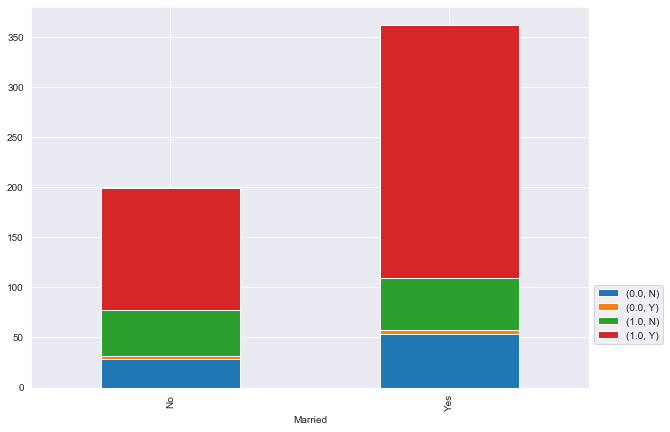

In [23]:
a = pd.crosstab(train_data['Married'], [train_data['Credit_History'], train_data['Loan_Status']])
a.plot(kind = 'bar', stacked = True, figsize = (10,7), legend = True).legend(loc=3, bbox_to_anchor=(1.0,0.1));

In [24]:
pd.DataFrame(train_data.groupby(['Married','Credit_History','Loan_Status'])['Loan_Status'].count())

Loan_Status
Married Credit_History Loan_Status             
No      0.0            N                     29
                       Y                      3
        1.0            N                     45
                       Y                    122
Yes     0.0            N                     53
                       Y                      4
        1.0            N                     52
                       Y                    253

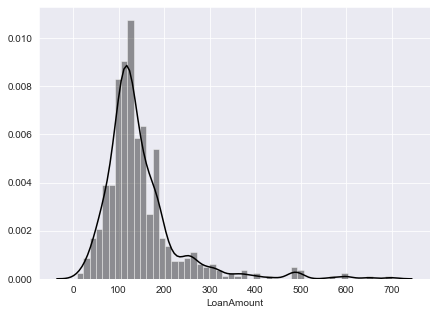

In [25]:
plt.figure(figsize =(7,5))
sns.distplot(train_data['LoanAmount'], bins = 50, color = 'k')

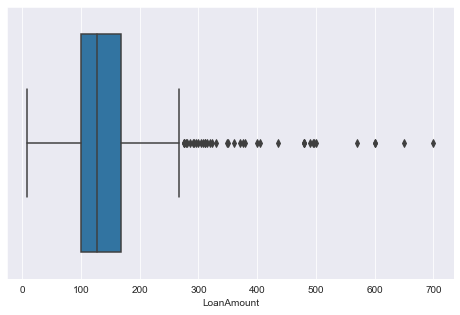

In [26]:
plt.figure(figsize =(8,5))
sns.boxplot(x = train_data['LoanAmount'])

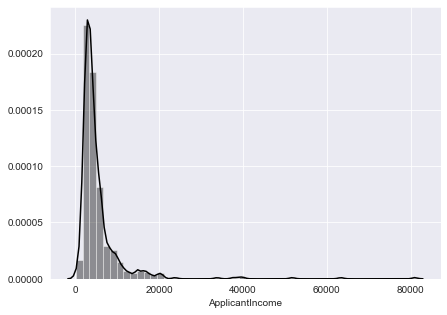

In [27]:
plt.figure(figsize =(7,5))
sns.distplot(train_data['ApplicantIncome'], bins = 50, color = 'k');

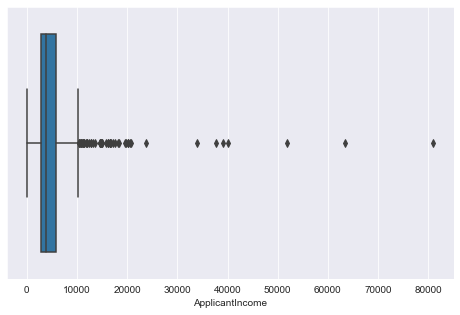

In [28]:
plt.figure(figsize =(8,5))
sns.boxplot(x = train_data['ApplicantIncome']);

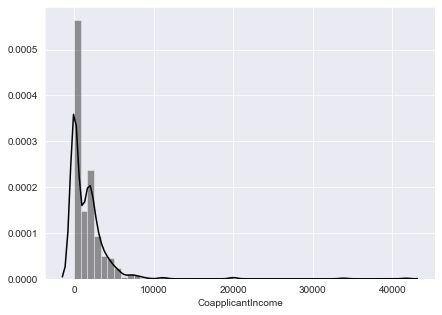

In [29]:
plt.figure(figsize =(7,5))
sns.distplot(train_data['CoapplicantIncome'], bins = 50, color = 'k');

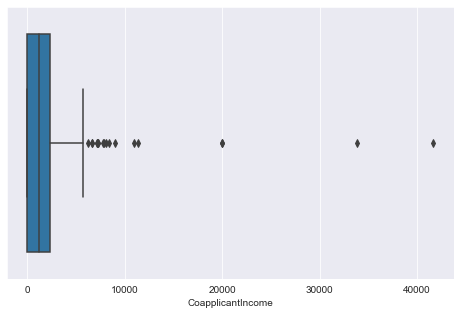

In [30]:
plt.figure(figsize =(8,5))
sns.boxplot(x = train_data['CoapplicantIncome']);

In [31]:
pd.DataFrame(train_data.groupby(['Education', 'Self_Employed'])['LoanAmount'].median())

LoanAmount
Education    Self_Employed            
Graduate     No                  130.0
             Yes                 157.5
Not Graduate No                  113.0
             Yes                 130.0

In [32]:
pd.DataFrame(train_data.groupby(['Self_Employed'])['LoanAmount'].median())

,LoanAmount
Self_Employed,
No,125.0
Yes,150.0


In [33]:
#def LoanAmount():
    
#   if (train_data['Education'] == 'Graduate').all() & (train_data['Self_Employed'] == 'Yes').all():
 #       train_data['LoanAmount'].fillna(value = 157.5)
  #  else:
   #     train_data['LoanAmount'].fillna(value = 125)

In [34]:
pd.DataFrame(train_data.groupby(['Married', 'Self_Employed'])['LoanAmount'].median())

LoanAmount
Married Self_Employed            
No      No                  111.5
        Yes                 132.0
Yes     No                  130.5
        Yes                 157.5

In [35]:
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0])

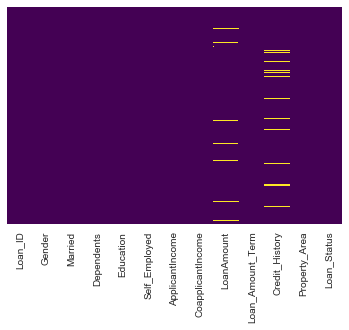

In [36]:
sns.heatmap(train_data.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [37]:
train_data['Credit_History'] = np.where(((train_data['Credit_History'].isnull()) & (train_data['Loan_Status'] == 'Y')), 1.0, train_data['Credit_History'])
train_data['Credit_History'] = np.where(((train_data['Credit_History'].isnull()) & (train_data['Loan_Status'] == 'N')), 0, train_data['Credit_History'])

In [38]:
train_data['LoanAmount'] = np.where(((train_data['LoanAmount'].isnull()) & (train_data['Self_Employed'] == 'Yes') & (train_data['Education'] == 'Graduate')), 157, train_data['LoanAmount'])
train_data['LoanAmount'] = np.where(((train_data['LoanAmount'].isnull()) & (train_data['Self_Employed'] == 'No')), 121, train_data['LoanAmount'])

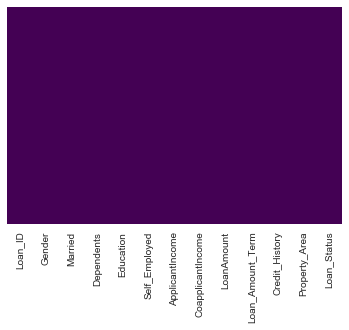

In [39]:
sns.heatmap(train_data.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [40]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
LE = LabelEncoder()
train_data['Loan_Status'] = LE.fit_transform(train_data['Loan_Status'])

train_data['Gender'] = train_data['Gender'].map({'Male':1,'Female':0})
train_data['Married'] = train_data['Married'].map({'Yes':1,'No':0})
train_data['Education'] = train_data['Education'].map({'Graduate':1,'Not Graduate':0})
train_data['Self_Employed'] = train_data['Self_Employed'].map({'Yes':1,'No':0})

Dummies = pd.get_dummies(train_data[['Dependents', 'Property_Area']],drop_first=True)
train_data = train_data.drop(['Dependents', 'Property_Area'], axis = 1)
train_data = pd.concat([train_data, Dummies], axis = 1)

In [43]:
train_data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,1,0,5849,0.0,121.0,360.0,1.0,1,0,0,0,0,1
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,LP001005,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1
3,LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1
4,LP001008,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [44]:
train_data['LoanAmount'] = np.log1p(train_data['LoanAmount'])
train_data['ApplicantIncome'] = np.log1p(train_data['ApplicantIncome'])
train_data['CoapplicantIncome'] = np.log1p(train_data['CoapplicantIncome'])

In [45]:
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data['Total_Income'] = np.log1p(train_data['Total_Income'])

In [46]:
train_data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Total_Income
0,LP001002,1,0,1,0,8.674197,0.000000,4.804021,360.0,1.0,1,0,0,0,0,1,2.269462
1,LP001003,1,1,1,0,8.430327,7.319202,4.859812,360.0,1.0,0,1,0,0,0,0,2.818370
2,LP001005,1,1,1,1,8.006701,0.000000,4.204693,360.0,1.0,1,0,0,0,0,1,2.197969
3,LP001006,1,1,0,0,7.857094,7.765993,4.795791,360.0,1.0,1,0,0,0,0,1,2.810793
4,LP001008,1,0,1,0,8.699681,0.000000,4.955827,360.0,1.0,1,0,0,0,0,1,2.272093


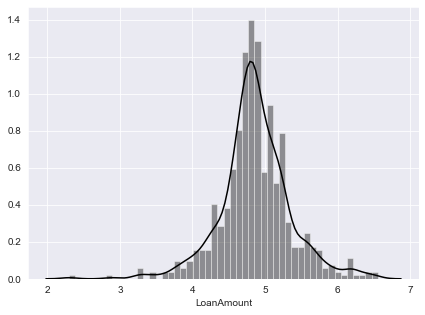

In [47]:
plt.figure(figsize =(7,5))
sns.distplot(train_data['LoanAmount'], bins = 50, color = 'k');

In [48]:
Z = train_data.drop(['Loan_Status', 'Loan_ID'], axis = 1)
a = train_data['Loan_Status']
num_feats = 8

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

Z_norm = MinMaxScaler().fit_transform(Z)
chi_selector = SelectKBest(chi2, k = num_feats)
fit = chi_selector.fit(Z_norm, a)
chi_support = chi_selector.get_support()
chi_feature = Z.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected feature')

8 selected feature


In [50]:
chi_feature

['Married',
 'Education',
 'CoapplicantIncome',
 'Credit_History',
 'Dependents_1',
 'Dependents_2',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [51]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Z.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['features_name','score']
featureScores.nlargest(10,'score')

,features_name,score
8,Credit_History,36.188460
12,Property_Area_Semiurban,7.103093
10,Dependents_2,1.996446
1,Married,1.782425
2,Education,0.988390
13,Property_Area_Urban,0.783946
9,Dependents_1,0.768400
5,CoapplicantIncome,0.740857
14,Total_Income,0.655563
11,Dependents_3+,0.384200


In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(Z,a)
print(model.feature_importances_)

[0.02253733 0.02082641 0.02166518 0.02292862 0.13198798 0.06723251
 0.12802242 0.04688868 0.31704593 0.02080437 0.015902   0.01551212
 0.02462864 0.01945229 0.12456551]


In [53]:
X = train_data.drop(['Loan_Status', 'Loan_ID'], axis = 1)

y = train_data['Loan_Status']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [56]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.48      0.63        33
           1       0.84      0.98      0.90        90

    accuracy                           0.85       123
   macro avg       0.86      0.73      0.77       123
weighted avg       0.85      0.85      0.83       123

[[16 17]
 [ 2 88]]


In [60]:
print(accuracy_score(y_pred, y_test))

0.8455284552845529


In [61]:
model_LR2 = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']
param_grid = dict(penalty = penalty, C = C, solver = solver)

LR2 = GridSearchCV(estimator = model_LR2, param_grid = param_grid, scoring = 'accuracy', verbose = 1, n_jobs = -1)
LR2.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    5.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [62]:
LR2.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred_LR = LR2.predict(X_test)
print(classification_report(y_test, y_pred_LR))
print(confusion_matrix(y_test, y_pred_LR))
print(accuracy_score(y_pred_LR, y_test))

              precision    recall  f1-score   support

           0       0.89      0.48      0.63        33
           1       0.84      0.98      0.90        90

    accuracy                           0.85       123
   macro avg       0.86      0.73      0.77       123
weighted avg       0.85      0.85      0.83       123

[[16 17]
 [ 2 88]]
0.8455284552845529


In [64]:
from sklearn.svm import SVC

In [65]:
SVC = SVC()
SVC.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
y_pred_svc = SVC.predict(X_test)
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(accuracy_score(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       0.89      0.48      0.63        33
           1       0.84      0.98      0.90        90

    accuracy                           0.85       123
   macro avg       0.86      0.73      0.77       123
weighted avg       0.85      0.85      0.83       123

[[16 17]
 [ 2 88]]
0.8455284552845529


In [67]:
from sklearn.svm import SVC
model_SVC2 = SVC()
C = [0.01, 0.1, 1]
kernel = ['linear', 'poly', 'rbf']
param_grid = dict(C = C, kernel = kernel)

SVC2 = GridSearchCV(estimator = model_SVC2, param_grid = param_grid, scoring = 'accuracy', verbose = 1, n_jobs = -1)
SVC2.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [68]:
SVC2.best_estimator_

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
y_pred_SVC2 = SVC2.predict(X_test)
print(classification_report(y_test, y_pred_SVC2))
print(confusion_matrix(y_test, y_pred_SVC2))
print(accuracy_score(y_pred_SVC2, y_test))

              precision    recall  f1-score   support

           0       0.89      0.48      0.63        33
           1       0.84      0.98      0.90        90

    accuracy                           0.85       123
   macro avg       0.86      0.73      0.77       123
weighted avg       0.85      0.85      0.83       123

[[16 17]
 [ 2 88]]
0.8455284552845529


# Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
y_pred_dtc = dtc.predict(X_test)
print(classification_report(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(accuracy_score(y_pred_dtc, y_test))

              precision    recall  f1-score   support

           0       0.44      0.82      0.57        33
           1       0.90      0.62      0.74        90

    accuracy                           0.67       123
   macro avg       0.67      0.72      0.66       123
weighted avg       0.78      0.67      0.69       123

[[27  6]
 [34 56]]
0.6747967479674797


# Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [73]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(accuracy_score(y_pred_rfc, y_test))

              precision    recall  f1-score   support

           0       0.70      0.58      0.63        33
           1       0.85      0.91      0.88        90

    accuracy                           0.82       123
   macro avg       0.78      0.74      0.76       123
weighted avg       0.81      0.82      0.82       123

[[19 14]
 [ 8 82]]
0.8211382113821138


In [74]:
model_rfc2 = RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(2,100,10), 
                    'n_estimators' : range(100,550,50),
                    'max_features':['auto','sqrt','log2'],
                    'max_depth' : range(0,100,10)
                    }

rfc2 = RandomizedSearchCV(estimator = model_rfc2, param_distributions = tuned_parameters, scoring = 'accuracy', verbose = 1, n_jobs = -1, random_state = 1)
rfc2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.2s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [75]:
rfc2.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
y_pred_rfc2 = rfc2.predict(X_test)
print(classification_report(y_test, y_pred_rfc2))
print(confusion_matrix(y_test, y_pred_rfc2))
print(accuracy_score(y_pred_rfc2, y_test))

              precision    recall  f1-score   support

           0       0.89      0.48      0.63        33
           1       0.84      0.98      0.90        90

    accuracy                           0.85       123
   macro avg       0.86      0.73      0.77       123
weighted avg       0.85      0.85      0.83       123

[[16 17]
 [ 2 88]]
0.8455284552845529


### It seems like all the alogorithm have used above provided almost same accuracy score except the DecisionTreeClassifier even after the hyperparameter tuning. 
#### Lets take a logistic regression model to work with test data

In [77]:
X = train_data.drop(['Loan_Status', 'Loan_ID'], axis = 1)
y = train_data['Loan_Status']

In [78]:
scaler_train_data = StandardScaler()
X = scaler_train_data.fit_transform(X)

In [79]:
rfc2.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.6s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

## Test data

In [80]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [81]:
test_data.shape

(367, 12)

In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [83]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [84]:
test_data.duplicated().sum()


0

In [85]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [86]:
test_data['Gender'] = test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data['Dependents'] = test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0])

In [87]:
pd.DataFrame(test_data.groupby(['Education','Credit_History'])['Credit_History'].count())

Credit_History
Education    Credit_History                
Graduate     0.0                         43
             1.0                        216
Not Graduate 0.0                         16
             1.0                         63

In [88]:
pd.DataFrame(test_data.groupby(['Education', 'Married', 'Credit_History'])['Credit_History'].count())

Credit_History
Education    Married Credit_History                
Graduate     No      0.0                         21
                     1.0                         74
             Yes     0.0                         22
                     1.0                        142
Not Graduate No      0.0                          3
                     1.0                         22
             Yes     0.0                         13
                     1.0                         41

In [89]:
pd.DataFrame(test_data.groupby(['Self_Employed', 'Education'])['LoanAmount'].median())

LoanAmount
Self_Employed Education               
No            Graduate           130.0
              Not Graduate       120.0
Yes           Graduate           137.0
              Not Graduate       119.0

In [90]:
test_data['Credit_History'] = np.where(((test_data['Credit_History'].isnull()) & (test_data['Education'] == 'Graduate') & (test_data['Married'] == 'Yes')), 1.0, test_data['Credit_History'])
test_data['Credit_History'] = np.where(((test_data['Credit_History'].isnull()) & (test_data['Education'] == 'Graduate') & (test_data['Married'] == 'No')), 0, test_data['Credit_History'])
test_data['Credit_History'] = np.where((test_data['Credit_History'].isnull()), 0, test_data['Credit_History'])

In [91]:
test_data['LoanAmount'] = np.where(((test_data['LoanAmount'].isnull()) & (test_data['Self_Employed'] == 'Yes') & (test_data['Education'] == 'Graduate')), 137, test_data['LoanAmount'])
test_data['LoanAmount'] = np.where(((test_data['LoanAmount'].isnull()) & (test_data['Self_Employed'] == 'No')), 122, test_data['LoanAmount'])

In [92]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [93]:
test_data['Gender'] = test_data['Gender'].map({'Male':1,'Female':0})
test_data['Married'] = test_data['Married'].map({'Yes':1,'No':0})
test_data['Education'] = test_data['Education'].map({'Graduate':1,'Not Graduate':0})
test_data['Self_Employed'] = test_data['Self_Employed'].map({'Yes':1,'No':0})

Dummies_test = pd.get_dummies(test_data[['Dependents', 'Property_Area']],drop_first=True)
test_data = test_data.drop(['Dependents', 'Property_Area'], axis = 1)
test_data = pd.concat([test_data, Dummies_test], axis = 1)

In [94]:
test_data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,1,1,0,5720,0,110.0,360.0,1.0,0,0,0,0,1
1,LP001022,1,1,1,0,3076,1500,126.0,360.0,1.0,1,0,0,0,1
2,LP001031,1,1,1,0,5000,1800,208.0,360.0,1.0,0,1,0,0,1
3,LP001035,1,1,1,0,2340,2546,100.0,360.0,1.0,0,1,0,0,1
4,LP001051,1,0,0,0,3276,0,78.0,360.0,1.0,0,0,0,0,1


In [95]:
test_data['LoanAmount'] = np.log1p(test_data['LoanAmount'])
test_data['ApplicantIncome'] = np.log1p(test_data['ApplicantIncome'])
test_data['CoapplicantIncome'] = np.log1p(test_data['CoapplicantIncome'])

test_data['Total_Income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['Total_Income'] = np.log1p(test_data['Total_Income'])

In [96]:
test_data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Total_Income
0,LP001015,1,1,1,0,8.651899,0.000000,4.709530,360.0,1.0,0,0,0,0,1,2.267155
1,LP001022,1,1,1,0,8.031710,7.313887,4.844187,360.0,1.0,1,0,0,0,1,2.793959
2,LP001031,1,1,1,0,8.517393,7.496097,5.342334,360.0,1.0,0,1,0,0,1,2.834007
3,LP001035,1,1,1,0,7.758333,7.842671,4.615121,360.0,1.0,0,1,0,0,1,2.809463
4,LP001051,1,0,0,0,8.094684,0.000000,4.369448,360.0,1.0,0,0,0,0,1,2.207690


In [97]:
ID = test_data['Loan_ID']
test = test_data.drop('Loan_ID', axis = 1)

In [98]:
scaler_test_data = StandardScaler()
test = scaler_test_data.fit_transform(test)

In [99]:
output = rfc2.predict(test)

In [100]:
type(output)

numpy.ndarray

In [101]:
output = pd.Series(output, name='Loan_Status')

In [102]:
output = pd.DataFrame(output)
output.columns = ['Loan_Status']

In [103]:
Loan_ID = pd.DataFrame(ID)
Loan_ID.columns = ['Loan_ID']

In [104]:
final_predictions = pd.concat([Loan_ID, output], axis = 1)
final_predictions['Loan_Status'] = final_predictions['Loan_Status'].map({1:'Y', 0:'N'}) 

In [105]:
final_predictions.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [106]:
final_predictions['Loan_Status'].value_counts(normalize = True)

Y    0.792916
N    0.207084
Name: Loan_Status, dtype: float64

In [107]:
final_predictions.to_csv('submission_2.csv')